### **My First ML project**



### **Load Data**



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

ds = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
ds

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [8]:
ds.info() #Each Row has unique value. & there are (1144,5) -> 1144 Rows and 5 Columns
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


## **Data Preparation**

In [ ]:
# Data Preparation as X and Y

y = ds['logS']
y

In [20]:
X = ds.drop('logS', axis = 1) #Removing Y column from ds
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Data Splitting**

### **Splitting the data - Training (80%), Testing (20%)**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)


# **Building a Model**

## **LinearRegression Model**

In [29]:
# Training the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Applying Model to Make a predictions

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [40]:
#Evaluate Model Performance
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate the Y train and Y test with actual Y

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
print("MSE Train", lr_train_mse)
print("R2 Train", lr_train_r2)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
print("MSE Test", lr_test_mse)
print("R2 Test", lr_test_r2)

MSE Train 1.0075362951093687
R2 Train 0.7645051774663391
MSE Test 1.0206953660861033
R2 Test 0.7891616188563282


In [48]:
#Building a DataFrame
import pandas as pd

lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2 ]).transpose()
lr_results.columns = [["Model", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]]


## **RandomForest Model**



In [49]:
import sklearn.ensemble as en

rf = en.RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
# Applying Model to Make a predictions

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [52]:
#Evaluate Model Performance

from sklearn.metrics import mean_squared_error, r2_score

#Evaluate the Y train and Y test with actual Y
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print("MSE Train", rf_train_mse)
print("R2 Train", rf_train_r2)

print("MSE Test", rf_test_mse)
print("R2 Test", rf_test_r2)

MSE Train 0.08181701296761261
R2 Train 0.9808766363628114
MSE Test 0.649106368826632
R2 Test 0.8659183331866823


In [55]:
#Building a DataFrame

rf_results = pd.DataFrame(["RandomForest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = [["Model", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]]

## **Combining Both the models**



In [57]:
final_result = pd.concat([lr_results,rf_results])
final_result.reset_index(drop = True)

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,RandomForest,0.081817,0.980877,0.649106,0.865918


# **Data Visulization and Prediction**

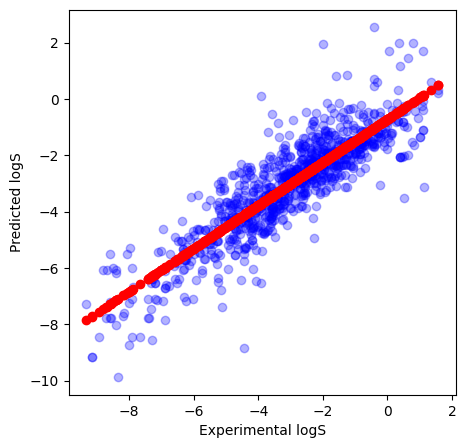

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_train, y_lr_train_pred,color='blue',alpha = 0.3)
plt.xlabel("Experimental logS")
plt.ylabel("Predicted logS")
z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)
plt.scatter(y_train, p(y_train),color='red')